## Solução - Exercícios 

Nesta lista de exercícios você vai continuar o trabalho que fizemos no Estudo de Caso neste capítulo. O código para carregar o dataset já está disponível para você. Leia cada exercício atentamente e coloque em prática suas habilidades analíticas. Todas as questões podem ser resolvidas com tudo já estudado até aqui no curso e consulte a documentação Python se necessário!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/dataframe_saved_v2.csv', parse_dates = ['Data'], usecols = list(range(0,6)))

In [3]:
df.dtypes

Data          datetime64[ns]
Distancia            float64
Tempo                 object
Segundos             float64
Minutos              float64
Min_Por_Km           float64
dtype: object

In [4]:
df.sort_index(inplace = True)
df.head()

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN


In [5]:
# Exercício 1 - Qual o valor máximo da coluna Minutos?
df.Minutos.max()

260.71666666666664

In [6]:
# Exercício 2 - Qual o valor mínimo de distância acima de 2.0?
df.Distancia[df.Distancia > 2.0].min()

2.01

Text(0, 0.5, 'Distância')

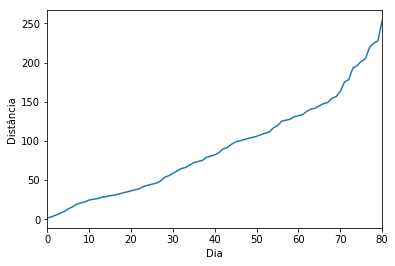

In [7]:
# Exercício 3 - Crie um plot com a frequência acumulada da coluna Distancia.
df.Distancia.cumsum().plot()
plt.xlabel("Dia")
plt.ylabel("Distância")

In [8]:
# Exercício 4 - Qual o dia da semana no índice de posição zero?
df.Data[0].strftime("%A")

'Sunday'

In [9]:
# Exercício 5 - Qual o dia da semana nos índices nas 5 primeiras posições?
df.Data.map(lambda x: x.strftime("%A")).head()

0      Sunday
1      Monday
2     Tuesday
3    Thursday
4      Friday
Name: Data, dtype: object

In [10]:
# Exercício 6 - Extraia todos os dias da semana (em formato texto) e insira em uma nova coluna no dataframe df.
df['Dia_Semana'] = df.Data.map(lambda x: x.strftime("%A"))

In [11]:
df.head(10)

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km,Dia_Semana
0,2015-08-02,1.70,NaN,NaN,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,NaN,NaN,Friday
5,2015-08-08,3.40,NaN,NaN,NaN,NaN,Saturday
6,2015-08-09,2.50,NaN,NaN,NaN,NaN,Sunday
7,2015-08-10,3.36,0:28:37,1717.0,28.616667,8.516865,Monday
8,2015-08-11,1.67,0:13:07,787.0,13.116667,7.854291,Tuesday
9,2015-08-12,1.42,0:10:35,635.0,10.583333,7.453052,Wednesday


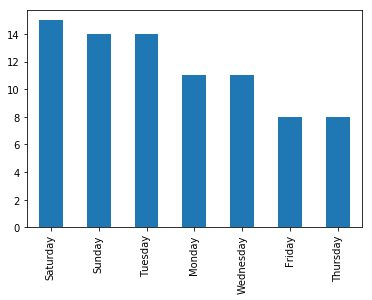

In [12]:
# Exercício 7 - Crie um gráfico de barras com o total da distância percorrida em cada dia da semana.
df[df.Distancia > 0].Dia_Semana.value_counts().plot(kind = 'bar')

In [13]:
# Exercício 8 - Delete a coluna Tempo do dataframe df.
del(df['Tempo'])

In [14]:
df.head()

,Data,Distancia,Segundos,Minutos,Min_Por_Km,Dia_Semana
0,2015-08-02,1.70,NaN,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,NaN,Friday


In [15]:
# Exercício 9 - Qual o total de corridas de taxi por dia da semana?
df['Distancia'] = df.Distancia[df.Distancia > 0]
dias = df.groupby('Dia_Semana')
dias.size()

Dia_Semana
Friday        8
Monday       11
Saturday     15
Sunday       14
Thursday      8
Tuesday      14
Wednesday    11
dtype: int64

In [19]:
df.Distancia <= 0

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
Name: Distancia, Length: 81, dtype: bool

In [17]:
# Exercício 10 - Qual a média para cada uma das colunas por dia da semana?
dias.mean()

,Distancia,Segundos,Minutos,Min_Por_Km
Dia_Semana,,,,
Friday,6.315000,5071.800000,84.530000,8.039543
Monday,2.422727,1185.750000,19.762500,7.463840
Saturday,2.786000,1458.500000,24.308333,7.747657
Sunday,3.246429,2802.500000,46.708333,8.184961
Thursday,3.315000,1681.285714,28.021429,7.829348
Tuesday,2.607143,1334.600000,22.243333,7.463291
Wednesday,2.428182,1306.250000,21.770833,7.659706


## FIM